In [64]:
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Image  
from sklearn.externals.six import StringIO
import pydot
%matplotlib inline

In [65]:
df = pd.DataFrame.from_csv('random_simulation.csv')
df

,action,left,light,next_waypoint,oncoming,reward,right
0,left,None,red,right,forward,-1.0,None
1,forward,None,red,right,forward,-1.0,None
2,left,None,red,right,forward,-1.0,None
3,forward,None,green,right,None,0.5,None
4,left,None,green,right,None,0.5,left
5,forward,None,green,right,None,0.5,None
6,forward,None,green,right,None,0.5,None
7,right,None,red,right,None,2.0,None
8,right,None,red,right,None,2.0,None
9,forward,None,green,forward,None,2.0,None


In [66]:
le = preprocessing.LabelEncoder()
le.fit(['forward', 'left', 'right', 'None'])
le.classes_

array(['None', 'forward', 'left', 'right'], 
      dtype='|S7')

In [40]:
le_light = preprocessing.LabelEncoder()
le_light.fit(['green', 'red'])
le_light.classes_

array(['green', 'red'], 
      dtype='|S5')

In [41]:
df['action_t'] = le.transform(df['action'])
df['left_t'] = le.transform(df['left'])
df['oncoming_t'] = le.transform(df['oncoming'])
df['right_t'] = le.transform(df['right'])
df['next_waypoint_t'] = le.transform(df['next_waypoint'])
df['light_t'] = le_light.transform(df['light'])

In [67]:
df

,action,left,light,next_waypoint,oncoming,reward,right
0,left,None,red,right,forward,-1.0,None
1,forward,None,red,right,forward,-1.0,None
2,left,None,red,right,forward,-1.0,None
3,forward,None,green,right,None,0.5,None
4,left,None,green,right,None,0.5,left
5,forward,None,green,right,None,0.5,None
6,forward,None,green,right,None,0.5,None
7,right,None,red,right,None,2.0,None
8,right,None,red,right,None,2.0,None
9,forward,None,green,forward,None,2.0,None


In [69]:
df[df['next_waypoint'] == 'right'][df['oncoming'] == 'left'][df['action'] == 'right']

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,action,left,light,next_waypoint,oncoming,reward,right
102,right,None,red,right,left,2.0,None
730,right,None,green,right,left,2.0,None
853,right,None,red,right,left,2.0,None


In [47]:
X = df[['action_t', 'left_t', 'next_waypoint_t', 'oncoming_t', 'right_t', 'light_t']].tail(500)
X

,action_t,left_t,next_waypoint_t,oncoming_t,right_t,light_t
715,3,0,2,0,0,0
716,2,0,3,1,0,1
717,2,0,3,0,0,0
718,3,0,2,0,0,0
719,1,0,1,0,0,0
720,3,0,1,0,0,0
721,3,0,2,0,0,1
722,3,0,3,0,0,1
723,0,0,3,0,0,0
724,2,0,3,0,0,0


In [49]:
y = df['reward'].tail(500)
y

715     1
716     0
717     1
718     1
719     1
720     1
721     1
722     1
723     1
724     1
725     1
726     1
727     0
728     1
729     1
730     1
731     1
732     1
733     1
734     1
735     0
736     0
737     1
738     1
739     1
740     1
741     0
742     1
743     0
744     0
       ..
1185    1
1186    1
1187    0
1188    0
1189    0
1190    0
1191    1
1192    0
1193    1
1194    1
1195    0
1196    1
1197    1
1198    0
1199    0
1200    0
1201    1
1202    1
1203    1
1204    1
1205    1
1206    1
1207    1
1208    1
1209    1
1210    1
1211    1
1212    0
1213    1
1214    1
Name: reward, dtype: int64

In [54]:
clf = tree.DecisionTreeClassifier(min_samples_split=1, criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=1, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

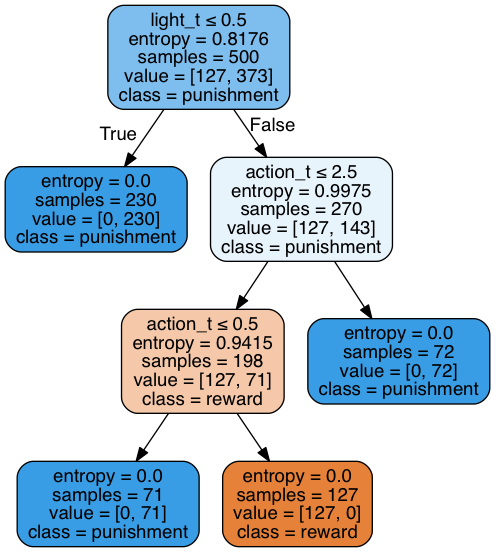

In [56]:

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=['action_t', 'left_t', 'next_waypoint_t', 'oncoming_t', 'right_t', 'light_t'],  
                         class_names=['reward', 'punishment'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [10]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')